# Spotify Dataset 1921-2020, 160k+ Tracks

https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

CRIPS ANALYSIS:
- In order to write a popular song, is the key and mode important?
- Is there a change/evolution in the usage of the most popular keys in the last 100 years? 
- <a href='#0_dance'>What are those songs with high popularity but zero tempo, zero danceability and zero speechiness?</a>
- <a href='#pop_trigger'>Is there raise in the level of the popularity measure and if yes, which artists triggered this development?</a>
- Who are the actual top performing artists?
- What should I do to become a famous music composer?

### DataFrame SUMMARY: 
- Dataset with 170653 observations, 19 columns (13 numerical and 6 categorical/dummy) and no nan values
- **numerical** columns: 
    - acousticness: The relative metric of the track being acoustic, (Ranges from 0 to 1)
    - danceability: The relative measurement of the track being danceable, (Ranges from 0 to 1)
    - energy: The energy of the track,  (Ranges from 0 to 1)
    - duration_ms: The length of the track in milliseconds (ms), (Integer typically ranging from 200k to 300k)
    - instrumentalness:, The relative ratio of the track being instrumental, (Ranges from 0 to 1)
    - valence: The positiveness of the track, (Ranges from 0 to 1)
    - popularity: The popularity of the song lately, default country = US, (Ranges from 0 to 100)
    - tempo:The tempo of the track in Beat Per Minute (BPM), (Float typically ranging from 50 to 150)
    - liveness: The relative duration of the track sounding as a live performance, (Ranges from 0 to 1)
    - loudness: Relative loudness of the track in decibel (dB), (Float typically ranging from -60 to 0)
    - speechiness: The relative length of the track containing any kind of human voice, (Ranges from 0 to 1)
    - year: The release year of track, (Ranges from 1921 to 2020)
    - id, The primary identifier for the track, generated by Spotify
    
- **categorical** columns:
    - key: The primary key of the track encoded as integers in between 0 and 11 (starting on C as 0, C# as 1 and so on…)
    - artists: The list of artists credited for production of the track 
    - release_date: Date of release mostly in yyyy-mm-dd format, however precision of date may vary
    - name: The title of the track 
    - mode: The binary value representing whether the track starts with a major (1) chord progression or a minor (0)
    - explicit: The binary value whether the track contains explicit content or not, (0 = No explicit content, 1 = Explicit content)

## Content

### Anlysis of the Dataframe 
Shape, descriptive statistics, number of missing values, number and sort of categorical and numerical values 
##### <a href='#df'>DataFrame Table</a>
##### <a href='#df_ds'>Descriptive Statistics</a>
##### <a href='#df_sum'>Dtypes, Missing Values, Shape</a>

### Cleaning 
In order to implement a good model for songs popularity some claening steps have to be done
##### <a href='#clean_pop'>Missclassified values in popularity</a>


### Create dummy variables for categorical variables 
The 'key' column for example is a column with categorical values. As its dependence on song popularity will be studied,a categorical transformation is needed.
### <a href='#dum'>Create dummy variables</a>


### Create subsets
Time dependent analysis will be done. For this reason the dataset is divided in decades and the decade 2011 to 2020 is also separeted into years.
### <a href='#sub'>Create subsets</a>

### Evaluation of distributions
Evaluation of 'key' and 'mode' frequency distributions for certain time periods. Main question: Does the song popularity dependent on its key scale and/or mode?
### <a href='#vc'>Value Counts</a>
##### <a href='#vc_h'>Histograms</a>
##### <a href='#vc_pd'>Bar Plots & Pie Charts - Key and Mode Distributions 1921-2020</a>
##### <a href='#vc_pp'>Pie Charts - Popularity triggered by Key and Mode 1921 -2020?</a>

##### <a href='#vc_pd_2011'>Bar Plots & Pie Charts - Key and Mode Distributions 2011-2020</a>
##### <a href='#vc_pp_2011'>Pie Charts - Popularity triggered by Key and Mode 2011 -2020?</a>

### Correlation analysis
What are the main indicators for song popularity?
### <a href='#cor'>Correlations</a>
##### <a href='#cor_p'>Correlation plot</a>
##### <a href='#cor_s'>Correlation sorted</a>

### <a href='#cor'>Time Series plots</a>

## Important Libraries - Data Loading

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib
import plot_df
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Markdown, display, HTML

def printmd(string):
    display(Markdown(string))

# SKLEARN - ML
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# TENSORFLOW - ML
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('./Spotify_Music_Datasets_1921_2020_data.csv')

def plot_bar(df, title, **kwargs):
    bar_setting_dict={
                    'x_label' : '',
                    'y_label' : '',
                    'figsize' :(6,4),
                    'layout' : (1, 1),
                    'width' : 0.3,
                    'align' : 'center',
                    'subplots' : False,
                    'fontsize_title' : 14,
                    'fontsize_axes_values' : 14,
                    'fontsize_axes_label' : 14,
                    'fontsize_text' : 14,
                    'fontsize_legend' : 14,
                    'set_yticks_range' : False,
                    'yticks_start' : None,
                    'yticks_end' : None,
                    'yticks_step' : None,
                    'legend_state' : False,
                    'legend_list_to_plot' : '',
                    'legend_move' : False,
                    'legend_x' : None,
                    'legend_y' : None}
    for key, value in kwargs.items():
        bar_setting_dict[key] = value
    plot_df.plot_df_bar(df, title, bar_setting_dict)

    
def plot_pie(df, title, explode, **kwargs):
    pie_chart_settings = {'figsize' : (10,5),
                        'shadow' : True,
                        'autopct' : '%1.1f%%',
                        'startangle' :90,
                        'fontsize_title' : 14,
                        'fontsize_text' : 14,
                        'fontsize_legend' : 14,
                        'legend_state' : True,
                        'legend_title' : '',   
                        'legend_list_to_plot' : '',
                        'legend_move' : False,
                        'legend_x' : None,
                        'legend_y' : None}
    
    for key, value in kwargs.items():
        pie_chart_settings[key] = value
    plot_df.plot_df_pie(df, title, explode, pie_chart_settings)

<a id='df'></a>

## DataFrame Head

In [2]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982000,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.21100,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732000,['Dennis Day'],0.819,180533,0.34100,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961000,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.16600,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967000,['Frank Parker'],0.275,210000,0.30900,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957000,['Phil Regan'],0.418,166693,0.19300,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
5,0.1960,1921,0.579000,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.697,395076,0.34600,0,4pyw9DVHGStUre4J6hPngr,0.168000,2,0.1300,-12.506,1,Gati Mardika,6,1921,0.0700,119.824
6,0.4060,1921,0.996000,['John McCormack'],0.518,159507,0.20300,0,5uNZnElqOS3W4fRmRYPk4T,0.000000,0,0.1150,-10.589,1,The Wearing of the Green,4,1921,0.0615,66.221
7,0.0731,1921,0.993000,['Sergei Rachmaninoff'],0.389,218773,0.08800,0,02GDntOXexBFUvSgaXLPkd,0.527000,1,0.3630,-21.091,0,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",2,1921,0.0456,92.867
8,0.7210,1921,0.996000,['Ignacio Corsini'],0.485,161520,0.13000,0,05xDjWH9ub67nJJk82yfGf,0.151000,5,0.1040,-21.508,0,La Mañanita - Remasterizado,0,1921-03-20,0.0483,64.678
9,0.7710,1921,0.982000,['Fortugé'],0.684,196560,0.25700,0,08zfJvRLp7pjAb94MA9JmF,0.000000,8,0.5040,-16.415,1,Il Etait Syndiqué,0,1921,0.3990,109.378


<a id='df_ds'></a>

## Descriptive Statistics

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
valence,170653,NaN,NaN,NaN,0.528587,0.263171,0,0.317,0.54,0.747,1
year,170653,NaN,NaN,NaN,1976.79,25.9179,1921,1956,1977,1999,2020
acousticness,170653,NaN,NaN,NaN,0.502115,0.376032,0,0.102,0.516,0.893,0.996
artists,170653,34088,['Эрнест Хемингуэй'],1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,170653,NaN,NaN,NaN,0.537396,0.176138,0,0.415,0.548,0.668,0.988
duration_ms,170653,NaN,NaN,NaN,230948,126118,5108,169827,207467,262400,5.4035e+06
energy,170653,NaN,NaN,NaN,0.482389,0.267646,0,0.255,0.471,0.703,1
explicit,170653,NaN,NaN,NaN,0.0845751,0.278249,0,0,0,0,1
id,170653,170653,5FQd4JXRcl2UwIToN7hkkk,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,170653,NaN,NaN,NaN,0.16701,0.313475,0,0,0.000216,0.102,1


<a id='df_sum'></a>

## DataFrame Summary

In [4]:
def get_dataframe_summary(df, cat_list, dummy_list):  
    number_nan = df.isnull().sum()
    printmd('### DataFrame Summary')
    printmd('- Dataset with {} observations and {} columns'.format(df.shape[0], df.shape[1]))
    
    print('___________________________________')
    printmd('- **Numerical** columns:')
    row_num = []
    count_int = 0
    count_float = 0
    for col in df.columns.tolist():
        if (df[col].dtypes == 'float64' or df[col].dtypes == 'int64') and col not in cat_list and col not in dummy_list:
            row_num.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
            if df[col].dtypes == 'int64':
                count_int += 1
            if df[col].dtypes == 'float64':
                count_float += 1
    df_num = pd.DataFrame(row_num,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    display(df_num)

    print('___________________________________')
    printmd('- **Categorical** columns:')
    row_cat = []
    count_object = 0
    for col in df.columns.tolist():
        if df[col].dtypes == 'object' or col in cat_list:
            row_cat.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
            count_object += 1
    df_cat = pd.DataFrame(row_cat,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    display(df_cat)

    print('___________________________________')
    printmd('- **Dummy** columns:')
    row_dummy = []
    for col in dummy_list:
        if (df[col].dtypes == 'float64' or df[col].dtypes == 'int64'):
            row_dummy.append([col, df[col].dtypes, df[col].min(), df[col].max(), number_nan[col]])
    df_dummy = pd.DataFrame(row_dummy,columns=['column_name', 'type', 'min', 'max', 'number NaN'])
    display(df_dummy)
    
    print('___________________________________')
    printmd('- There are ***{} numerical*** ({}x int and {}x float) columns'.format(count_int + count_float, count_int, count_float))
    printmd('- There are ***{} categorical*** columns'.format(count_object))
    printmd('- There are ***{} dummy*** columns'.format(len(dummy_list)))
    
    print('___________________________________')
    printmd('- There are ***{} missing values*** in total in the dataset'.format(df.isnull().values.sum()))
  
get_dataframe_summary(df, cat_list=['key', 'mode', 'explicit'],dummy_list=[])

### DataFrame Summary

- Dataset with 170653 observations and 19 columns

___________________________________


- **Numerical** columns:

,column_name,type,min,max,number NaN
0,valence,float64,0.0,1.000,0
1,year,int64,1921.0,2020.000,0
2,acousticness,float64,0.0,0.996,0
3,danceability,float64,0.0,0.988,0
4,duration_ms,int64,5108.0,5403500.000,0
5,energy,float64,0.0,1.000,0
6,instrumentalness,float64,0.0,1.000,0
7,liveness,float64,0.0,1.000,0
8,loudness,float64,-60.0,3.855,0
9,popularity,int64,0.0,100.000,0


___________________________________


- **Categorical** columns:

,column_name,type,min,max,number NaN
0,artists,object,"[""'In The Heights' Original Broadway Company"",...",['조정현'],0
1,explicit,int64,0,1,0
2,id,object,000G1xMMuwxNHmwVsBdtj1,7zzuPsjj9L3M7ikqGmjN0D,0
3,key,int64,0,11,0
4,mode,int64,0,1,0
5,name,object,!Que Vida! - Mono Version,텅 빈 마음 Empty Heart,0
6,release_date,object,1921,2020-11-24,0


___________________________________


- **Dummy** columns:

,column_name,type,min,max,number NaN


___________________________________


- There are ***12 numerical*** (3x int and 9x float) columns

- There are ***7 categorical*** columns

- There are ***0 dummy*** columns

___________________________________


- There are ***0 missing values*** in total in the dataset

### Normalization will be needed!
- As it can be seen from the min max ranges of all variables, a normalization (or standardization) approach may be beneficial in order to obtain fruitful predictions for popularity.

## The numerical part: Remove some variables
As the focus is on song popularity one should remove variables that are not useful for its prediction
- ***id:*** Splits into 170653 unique entires. This is the number of rows in the dataset. This column should be removed from the data investigation.
- ***name:*** Can be removed as there is too less power for a popularity prediction. There are 133638 unique entries (78% of the dataframe).There are some dublicates, but too less, to justify its transformation to dummy variables.
- ***release-date:*** as it can be already seen from rhe desciptive statistics table(min and max) there is some mixture in datetime formats. It can be ignored as the focus is on a yearly based analysis. This information is already provided in the 'year' column.

#### Let's start with an investigation of the numerical values: So remove: 
- ***artists:*** For sure, this is an important column for popularity. By inuition it is clear, that for an already famous artist it will be more easy to produce a new popular song than for an unknown artist. However, in the first part it will be removed.
- ***mode:*** This is a categorical variable with 0 and 1. Mode will be investigated separately.
- ***key:*** A categorical variable with values ranging between 0 and 11, each value for one note. Key will be analyzed separately.
- ***explicit*** is a categorical variable with 0 and 1. It's dependence on popularity will be studied separately.


In [5]:
y_var = 'popularity'
printmd('#### Dependent variable')
print(y_var)

x_y_columns = df.drop(['id', 'name', 'release_date', 'artists', 'mode', 'key', 'explicit', 'popularity'], axis=1).columns.tolist()
printmd('#### Dependent and independent variable set')
print(x_y_columns)

x_columns = df.drop(['id', 'name', 'release_date', 'artists', 'mode', 'key', 'explicit'], axis=1).columns.tolist()
printmd('#### Only independent variables')
print(x_columns)

data_num = df.copy()
data_num = data_num.drop(['id', 'name', 'release_date', 'artists', 'mode', 'key', 'explicit'], axis=1)
printmd('#### New shape of data_num')
print(data_num.shape)

#### Dependent variable

popularity


#### Dependent and independent variable set

['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']


#### Only independent variables

['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo']


#### New shape of data_num

(170653, 12)


## PDFs and Scatter plots of numerical variables for popularity study: 
Let's start with the numerical variables of the dataset. A more focused analysis of categorical/dummy variables will be done later on. So let's study the ramaining columns of data_num a bit more intensively.

In [6]:
"""
plt.figure(figsize=(10,5))
for i, xvar in enumerate(x_columns):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=df[xvar], y=df.popularity)
    
plt.tight_layout()
""";

### Full data scatter plots

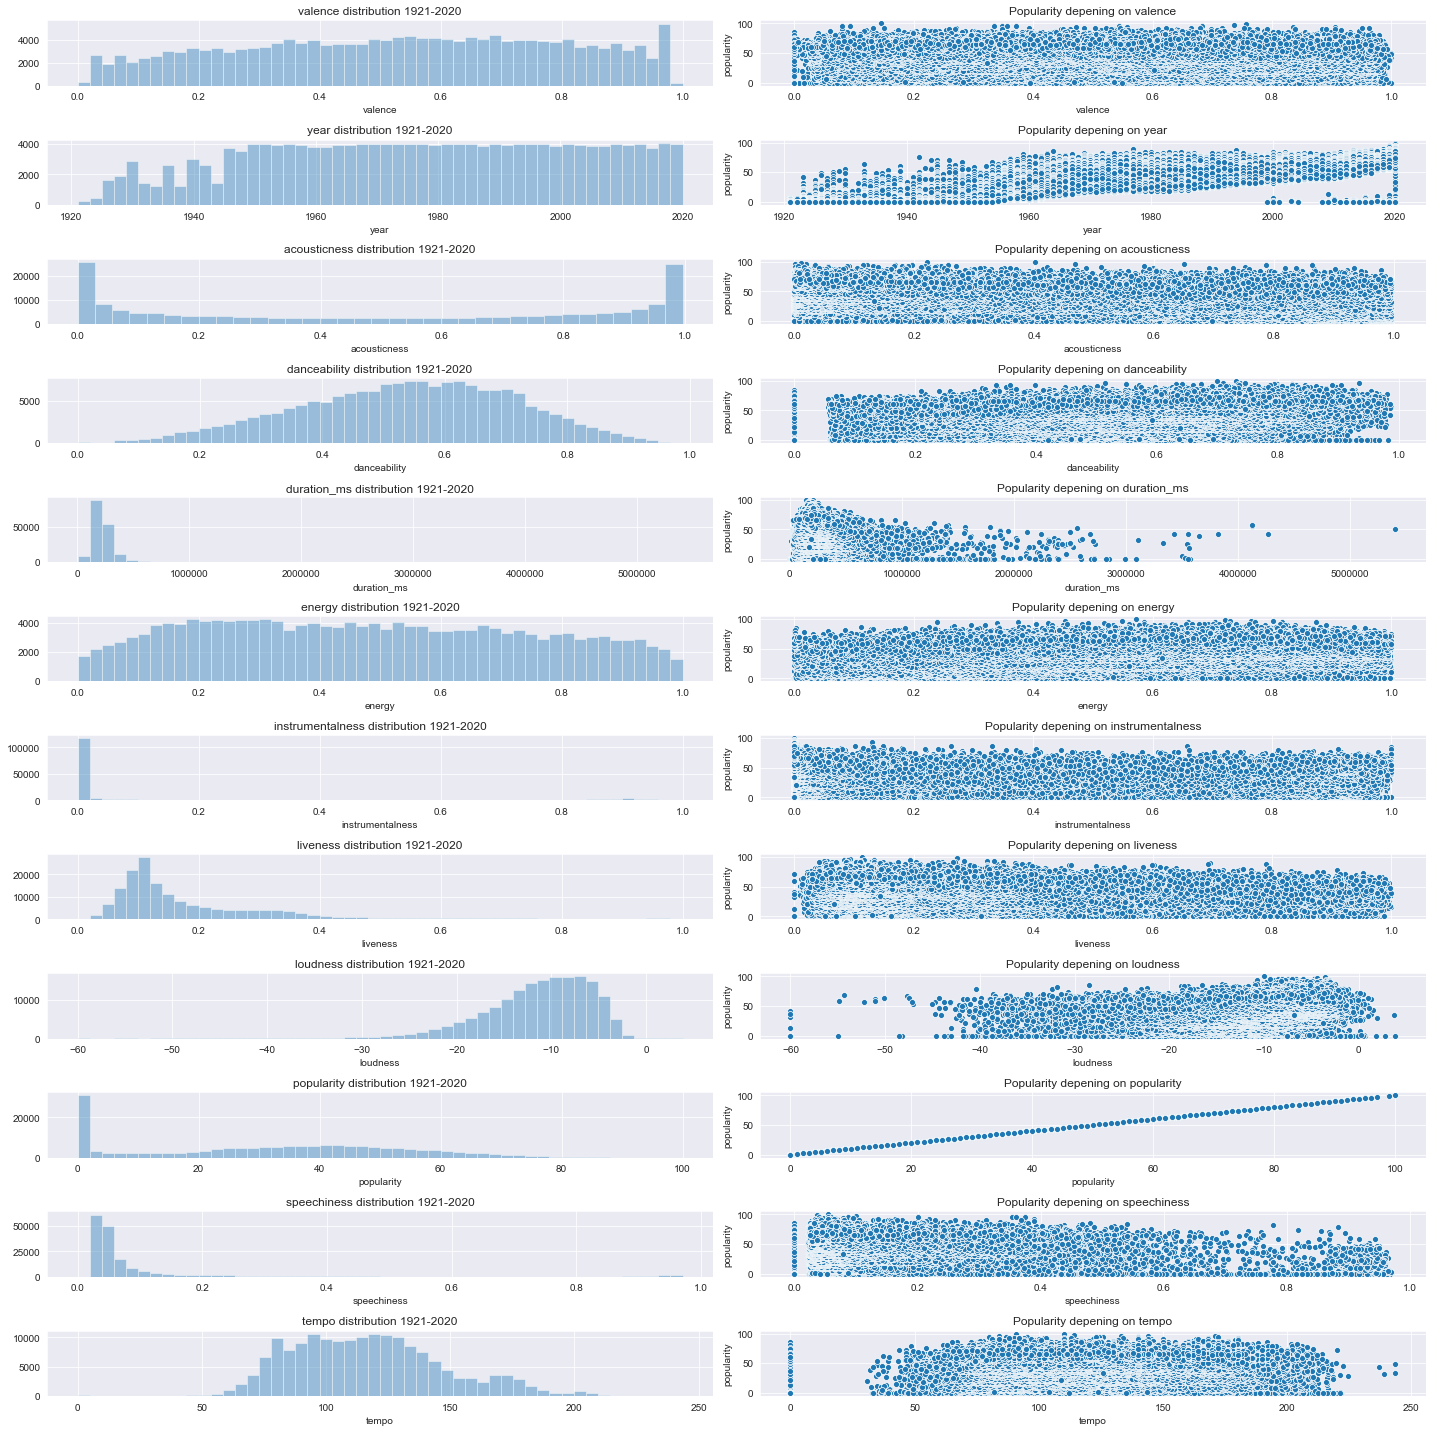

In [7]:
plt.figure(figsize=(20,20))
count=1

for xvar in x_columns:
    plt.subplot(12,2, count);
    count += 1
    plt.gca().set_title(xvar + ' distribution 1921-2020');
    sns.distplot(a=df[xvar], kde=False);
    plt.subplot(12,2,count);
    count +=1
    plt.gca().set_title('Popularity depening on ' + xvar);
    sns.scatterplot(x=df[xvar], y=df.popularity);
    #sns.kdeplot(data=data_num[[xvar, 'popularity']], hue="kind", fill=True)
    #mean_df = df.groupby([xvar])['popularity'].mean().to_frame().reset_index()
    #sns.scatterplot(x=mean_df[xvar], y=mean_df.popularity, data=mean_df)

#plt.subplots_adjust(space = 0.5)
plt.tight_layout()

PDF distributions (left) and Scatter plots (right)
- The pdf plots (left side) help to understand the value distributions of all the variables.
- The scatter plots (right side) show the dependence of popularity on the numerical variables

### Overview of the numerical variables
- danceability: The relative measurement of the track being danceable, (Ranges from 0 to 1)
- energy: The energy of the track,  (Ranges from 0 to 1)
- duration_ms: The length of the track in milliseconds (ms), (Integer typically ranging from 200k to 300k)
- instrumentalness:, The relative ratio of the track being instrumental, (Ranges from 0 to 1)
- valence: The positiveness of the track, (Ranges from 0 to 1)
- popularity: The popularity of the song lately, default country = US, (Ranges from 0 to 100)
- tempo:The tempo of the track in Beat Per Minute (BPM), (Float typically ranging from 50 to 150)
- liveness: The relative duration of the track sounding as a live performance, (Ranges from 0 to 1)
- loudness: Relative loudness of the track in decibel (dB), (Float typically ranging from -60 to 0)
- speechiness: The relative length of the track containing any kind of human voice, (Ranges from 0 to 1)
- year: The release year of track, (Ranges from 1921 to 2020)
- id, The primary identifier for the track, generated by Spotify

#### Outliers are dominant in some cases
- For example: Outliers are obvious for ***tempo*** with some ***0bpm*** cases but a certain popularity. This has to be checked.
- Similar to 0 zero tempo there are songs with with ***0 danceability*** and ***0 speechiness***.
- ***acousticness***, ***duration_ms***, ***instrumentalness*** and '***speechiness***' show a binary tendency between their 0 min and max values. It seems that a kind of logistic descision/classification was used two separate between two possible scenarios, for example between acoustic or non-acoustic songs.
- ***popularity*** shows a lot 0 values. It is not really clear if those values are true or due to missing data. Especially in the year is strange. It is the only year with almost the whole range of values. It could be that those values are related to ongoing data collection (not finished data setting for 2020)
- Not all variables are normally distributed. Hence, in a strict Linear Regression Approach via OLS some data arrangement would be needed to obtain stable predictions. Some data cleaning could help to optimize predictions.

Those phenomena will be studied in more detail in the next sections

### Mean popularity data scatter plots

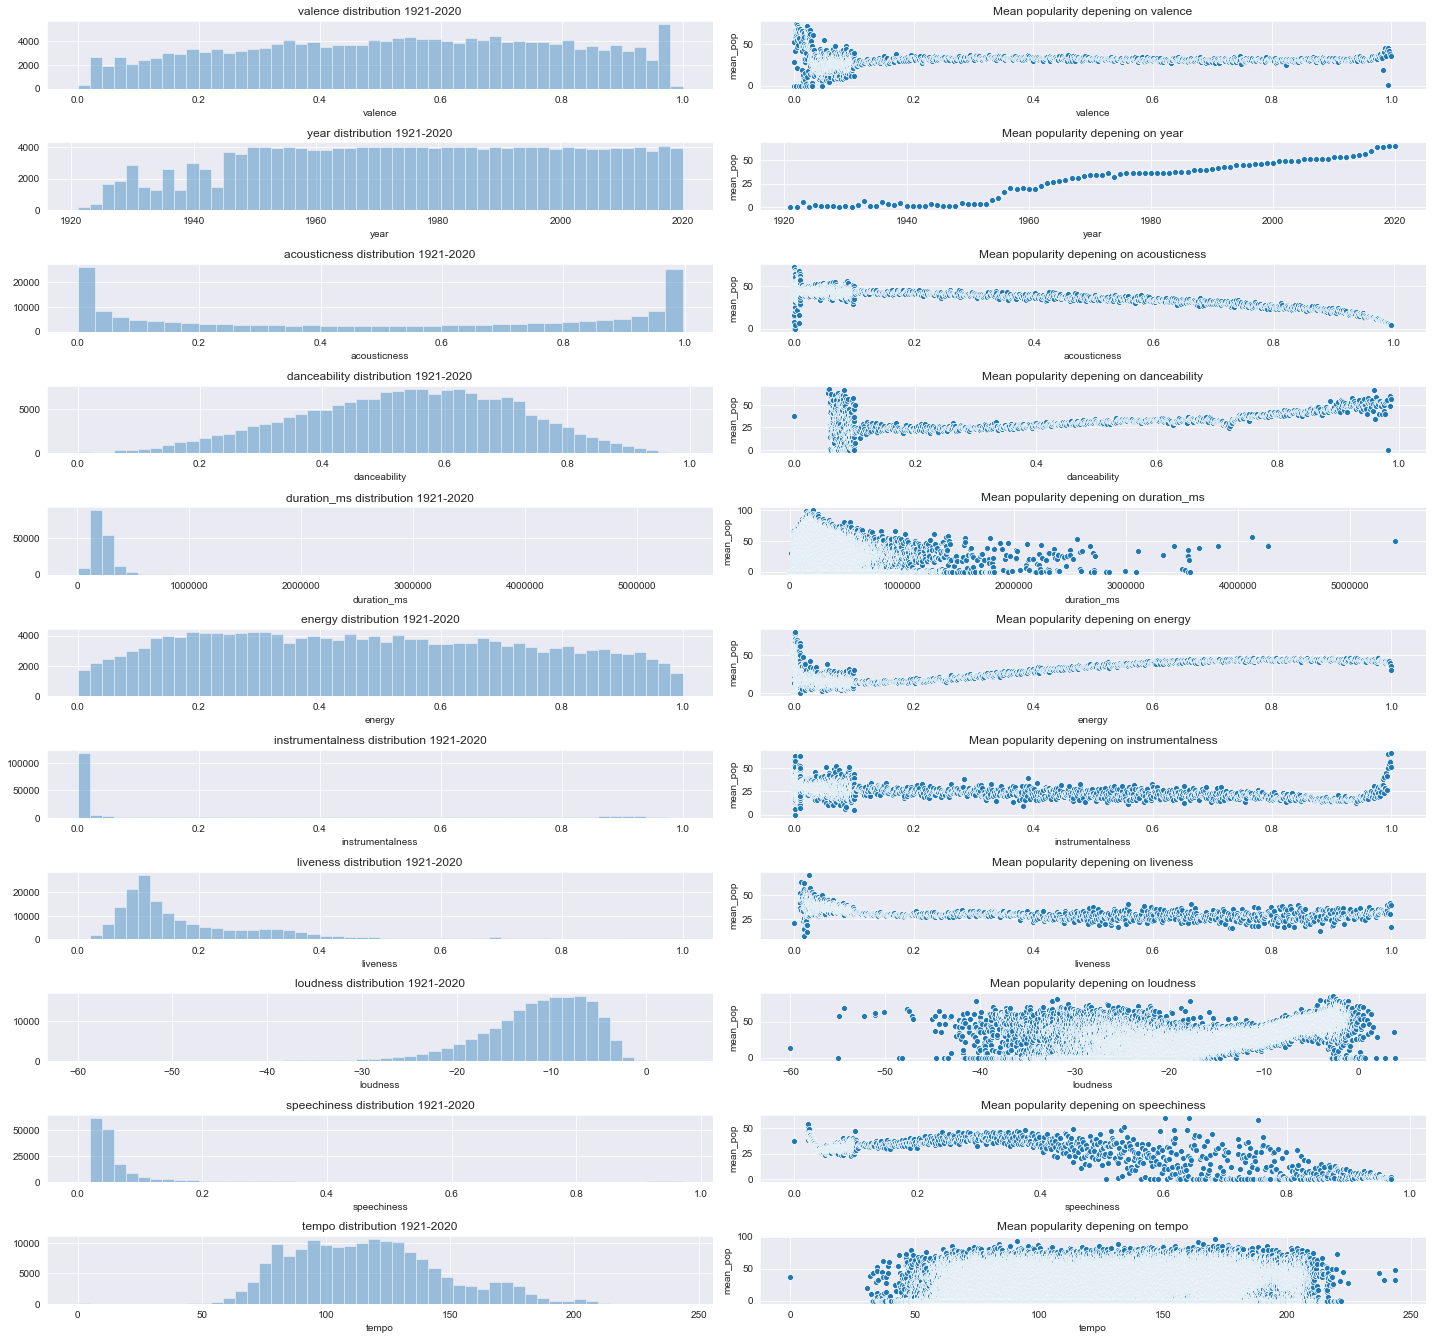

In [75]:
plt.figure(figsize=(20,20))
count=1

for xvar in x_y_columns:
    plt.subplot(12,2, count);
    count += 1
    plt.gca().set_title(xvar + ' distribution 1921-2020');
    sns.distplot(a=df[xvar], kde=False);
    plt.subplot(12,2,count);
    count +=1
    plt.gca().set_title('Mean popularity depening on ' + xvar);
    #sns.scatterplot(x=df[xvar], y=df.popularity);
    #sns.kdeplot(data=data_num[[xvar, 'popularity']], hue="kind", fill=True)
    mean_df = df.groupby([xvar])['popularity'].mean().to_frame().reset_index()
    mean_df['mean_pop'] = mean_df['popularity']
    sns.scatterplot(x=mean_df[xvar], y=mean_df.mean_pop)

#plt.subplots_adjust(space = 0.5)
plt.tight_layout()

### Some first glance results:
There are some 'first glance relationshiphs' of the dependent variable 'popularity' on the independent variable set:

- For valence, popularity, acousticness, danceability, energy, instrumentalness, liveness there a certain data spreading in the low range region of the corresponding independent variable, e.g. for valence there is a data spread between valence=0.0 and valence=0.1. Those regions will be checked in detail below.

The folowing table indicates by arrows the location of high popularity region in the scatter plot. 
- An arrow &leftarrow; indicates a higher popularity to the lower range of the corresponding independent variable. 
- An arrow &rightarrow; indicates a higher popularity to the upper range of the corresponding independent variable. 
- RohP = Region of high popularity

Variable |  min &leftarrow; RohP &rightarrow; max
---------| -------
valence | &leftarrow;
year | &rightarrow;
acousticness | &leftarrow;
danceability | &leftarrow; &rightarrow;
duration_ms | &leftarrow;
energy | &leftarrow; &rightarrow;
instrumentalness | &leftarrow; &rightarrow;
liveness | &leftarrow;
loudness | &leftarrow;
speechiness | &leftarrow;
tempo | &leftarrow; &rightarrow;

<a id='pop_trigger'></a>

### Is there raise in the level of the popularity measure and if yes, which artists triggered this development?
Why is 'year' so important for popularity?
- A low noise trend can be observed for the popularity-dependence on year.
- It is obvious that popularity increases with years. There is a strong linear dependency between both starting from the late 1950s.
- Even more: There is an abrupt increase of popularity around the end of the fifties of the last century.
- Unfortunately, there isn't a kind of ‚Amount of Advertisement‘ column or ‚Social-Media-Likes‘-Column in the dataset. So this fact gives some room for speculation. But it is obvious, that it could be related to the development of television, cinema and later by a growing music fan base triggered by growing (social) media platforms with the years.

***1950-1960 most popular songs:***

,name,artist,popularity,year
7406,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,81,1959
7409,Johnny B. Goode,Chuck Berry,75,1959
7006,Blue Christmas,Elvis Presley,74,1957
7207,Jailhouse Rock,Elvis Presley,73,1958
7007,Dream A Little Dream Of Me - Single Version,"Ella Fitzgerald, Louis Armstrong",72,1957
7206,Come Fly With Me - Remastered,Frank Sinatra,70,1958
7411,Rudolph The Red-Nosed Reindeer,Dean Martin,70,1959
7216,My Baby Just Cares for Me - 2013 Remastered Ve...,Nina Simone,69,1958
7209,Hound Dog,Elvis Presley,69,1958
7407,Big Iron,Marty Robbins,69,1959


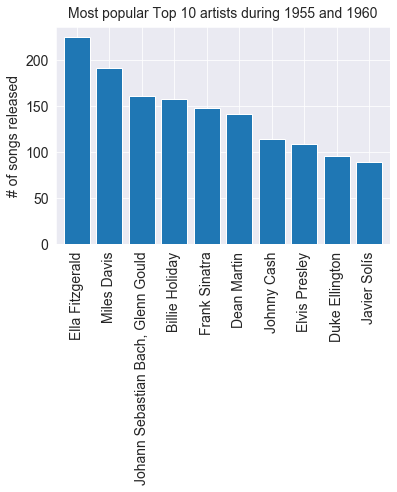

In [54]:
data_late50s_topArtists = df[(df['year'] > 1955) & (df['year'] < 1960)].sort_values(by='popularity', ascending=False)
printmd('***1950-1960 most popular songs:***')
data_late50s_topArtists.loc[:,'artist'] = data_late50s_topArtists['artists'].map(lambda x: x.replace('[', '').replace(']', '').replace('\'', ''))

display(data_late50s_topArtists[['name', 'artist', 'popularity', 'year']].head(10))

plot_bar(data_late50s_topArtists['artist'].value_counts().head(10), title ='Most popular Top 10 artists during 1955 and 1960', y_label = '# of songs released', width=0.8)

## Identifying 'quasi' NaN values
There are some columns with zero values which need special attention:

In [10]:
for col in x_columns:
    print('Proportion of 0 values in ', col,': ', round((len(df)- np.count_nonzero(df[col], axis=0))/len(df)*100,2), '%')

Proportion of 0 values in  valence :  0.11 %
Proportion of 0 values in  year :  0.0 %
Proportion of 0 values in  acousticness :  0.01 %
Proportion of 0 values in  danceability :  0.08 %
Proportion of 0 values in  duration_ms :  0.0 %
Proportion of 0 values in  energy :  0.01 %
Proportion of 0 values in  instrumentalness :  27.3 %
Proportion of 0 values in  liveness :  0.01 %
Proportion of 0 values in  loudness :  0.0 %
Proportion of 0 values in  popularity :  16.34 %
Proportion of 0 values in  speechiness :  0.08 %
Proportion of 0 values in  tempo :  0.08 %


In [11]:
for col in x_columns:
    printmd('Is subset of ***0 tempo*** equal to subset ***0 ' + col + '***? ' + str(df[df['tempo']==0].equals(df[df[col]==0])))


Is subset of ***0 tempo*** equal to subset ***0 valence***? False

Is subset of ***0 tempo*** equal to subset ***0 year***? False

Is subset of ***0 tempo*** equal to subset ***0 acousticness***? False

Is subset of ***0 tempo*** equal to subset ***0 danceability***? True

Is subset of ***0 tempo*** equal to subset ***0 duration_ms***? False

Is subset of ***0 tempo*** equal to subset ***0 energy***? False

Is subset of ***0 tempo*** equal to subset ***0 instrumentalness***? False

Is subset of ***0 tempo*** equal to subset ***0 liveness***? False

Is subset of ***0 tempo*** equal to subset ***0 loudness***? False

Is subset of ***0 tempo*** equal to subset ***0 popularity***? False

Is subset of ***0 tempo*** equal to subset ***0 speechiness***? True

Is subset of ***0 tempo*** equal to subset ***0 tempo***? True

<a id='0_dance'></a>

### What are those songs with high popularity but zero tempo, zero danceability and zero speechiness?
There are some songs with 0bpm but with a real popularity. This subset is identical to subsets with 0 danceability and 0 spechiness. These observations must be checked in detail. Are those songs real songs?

In [57]:
data_zero_tempo = df[df['tempo'] ==0].sort_values(by='popularity', ascending=False)
printmd('***# of songs with 0 bpm:*** ' + str(data_zero_tempo.shape[0]))
printmd('***Examples for 0 bpm songs:***')
display(data_zero_tempo[['name', 'artists', 'year', 'tempo', 'speechiness', 'danceability', 'popularity']].head(10))

***# of songs with 0 bpm:*** 143

***Examples for 0 bpm songs:***

,name,artists,year,tempo,speechiness,danceability,popularity
19030,Clean White Noise - Loopable with no fade,"['Erik Eriksson', 'White Noise Baby Sleep', 'W...",2017,0.0,0.0,0.0,85
19260,Soft Brown Noise,['High Altitude Samples'],2018,0.0,0.0,0.0,81
19038,White Noise - 500 hz,['Granular'],2017,0.0,0.0,0.0,79
19029,White Noise - 145 hz,['Granular'],2017,0.0,0.0,0.0,78
38356,White Noise Crashing Waves,['Bruce Brus'],2019,0.0,0.0,0.0,76
38133,Clean & Pure White Noise,['Zenibly'],2018,0.0,0.0,0.0,74
75221,Deep Sleep Recovery Noise,['Water Sound Natural White Noise'],2020,0.0,0.0,0.0,74
38348,Tepid Rainscape,['Fizzonaut'],2019,0.0,0.0,0.0,73
18641,Brown Noise - Loopable with No Fade,"['White Noise Meditation', 'Lullaby Land', 'Wh...",2015,0.0,0.0,0.0,72
56682,Pure Brown Noise - Loopable with no fade,"['Erik Eriksson', 'White Noise for Babies', 'W...",2017,0.0,0.0,0.0,72


***Result:*** 
In fact, as one can see from the above eavluation those 'songs' with zero bpm (zero danceability, zero speechiness) are not real songs but noises or sounds. It seems that those 'sounds' are popular because they seem to have a positive affect on deep sleep or for relaxation.  As the goal is to give an answer to music composer 'How to write popular ***real*** songs', those data should be removed from the dataset.    

## Removing 'quasi' NaN values

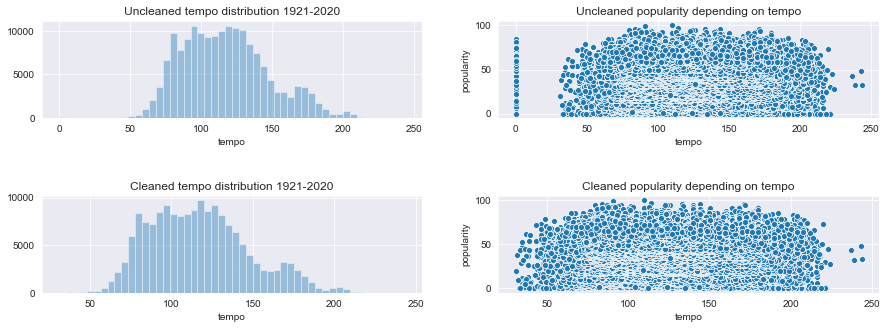

In [58]:
# Let's remove zero tempo (zero danceability and zero speechiness) rows
data_num = data_num[data_num['tempo'] !=0]

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.gca().set_title('Uncleaned tempo distribution 1921-2020')
sns.distplot(a=df.tempo, kde=False)
plt.subplot(2,2,2)
plt.gca().set_title('Uncleaned popularity depending on tempo')
sns.scatterplot(x=df.tempo, y=df.popularity)

plt.subplot(2,2,3)
plt.gca().set_title('Cleaned tempo distribution 1921-2020')
sns.distplot(a=data_num.tempo, kde=False)
plt.subplot(2,2,4)
plt.gca().set_title('Cleaned popularity depending on tempo')
sns.scatterplot(x=data_num.tempo, y=data_num.popularity)
plt.subplots_adjust(hspace = 0.8)

### Low range spreading for valence, acousticness, danceability, energy, instrumentalness, liveness

***valence***, ***acousticness***, ***danceability***, ***energy***, ***instrumentalness*** and '***liveness***' exhibit a certain data spreading in the low range region of the corresponding independent variable. In order to understand trends better we will focus on each of them in scatter and density plots in combination with the mean popularity. Is there still some linear trend?

<Figure size 216x216 with 0 Axes>

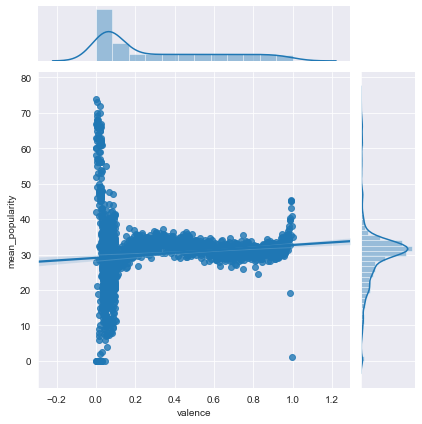

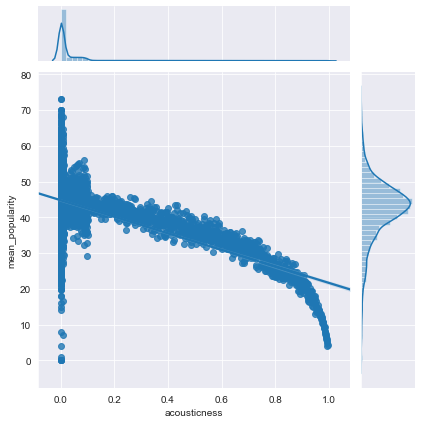

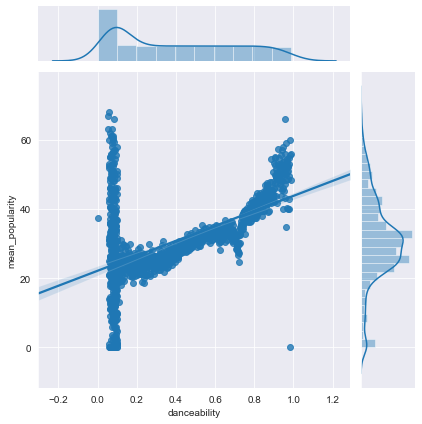

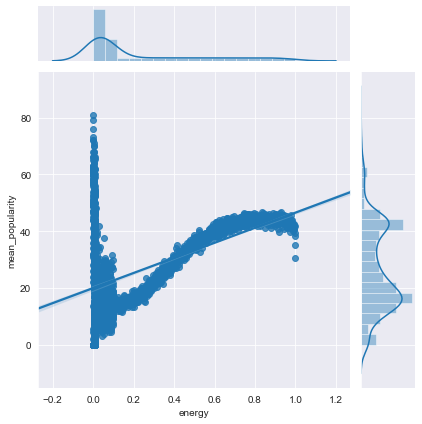

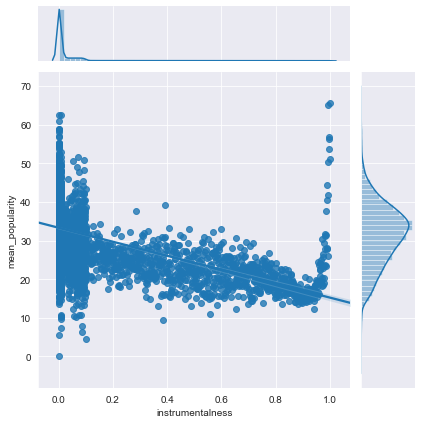

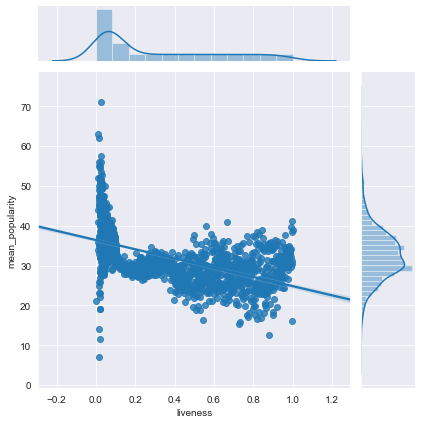

In [73]:
spread_set= ['valence', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness']

plt.figure(figsize=(3,3))
for i, xvar in enumerate(spread_set):
    mean_df = df.groupby([xvar])['popularity'].mean().to_frame().reset_index()
    mean_df['mean_popularity'] = mean_df['popularity']
    #sns.scatterplot(x=mean_df[xvar], y=mean_df.popularity)
    sns.jointplot(x=xvar, y='mean_popularity', data=mean_df, kind='reg')

<a id='popularity'></a>

### popularity:
There is an enourmous amount of 0 values for popularity between 1921 and 1950 and especially for 2020. For 2020 this observation could be related to no non completed datasets or real missing data. Hence it is worth to dare tests where those observations are treated as outliers to enhance a popularity prediction model. The amount of 0 for popularity results in 16%.

<a id='clean_pop'></a>

In [ ]:
# Let's remove 0 values rows for popularity
data_num = data_num[data_num['popularity'] !=0]

plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
plt.gca().set_title('Uncleaned popularity distribution 1921-2020')
sns.distplot(a=df.popularity, kde=False)
plt.subplot(2,2,2)
plt.gca().set_title('Uncleaned popularity depening on year')
sns.scatterplot(x=df.year, y=df.popularity)

plt.subplot(2,2,3)
plt.gca().set_title('Cleaned popularity distribution 1921-2020')
sns.distplot(a=data_num.popularity, kde=False)
plt.subplot(2,2,4)
plt.gca().set_title('Cleaned popularity depening on year')
sns.scatterplot(x=data_num.year, y=data_num.popularity)
plt.subplots_adjust(hspace = 0.8)

In [ ]:
column_set = data_cleaned.columns.tolist()
display(column_set)
display(len(column_set))

### Results after cleaning:
#### PDF (power ditribution function) of popularity:
- The pdf of popularity is after the cleaning step much more normally ditributed than before the cleaning process. A better model prediction is expected from the cleaning step.

## In order to write a popular song, is the key and mode important?
Does popularity depend on the categorical values of key and/or mode?

### Distributions of key and mode

In [ ]:
# Dictionary of musical notes for backward Key Note Translation
key_dictionary = {0: 'C', 1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#', 7:'G', 8:'G#', 9:'A', 10:'A#', 11:'B'}
key_list = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'] 
mode_dictionary = {0: 'Minor', 1:'Major'}

data_cleaned['key_note'] = data_cleaned['key'].map(key_dictionary) # Create a 'key_note' column
data_cleaned['mode_trans'] = data_cleaned['mode'].map(mode_dictionary) # Create a 'mode_trans' column

# Distribution of key notes
df_key_mode_vals_all = pd.DataFrame(index=key_list)
df_key_mode_vals_all['Major'] = data_cleaned[data_cleaned['mode_trans']=='Major']['key_note'].value_counts() #Provide a pandas series of the counts for each key note in Major
df_key_mode_vals_all['Minor'] = data_cleaned[data_cleaned['mode_trans']=='Minor']['key_note'].value_counts() #Provide a pandas series of the counts for each key note in Minor
#display(df_key_mode)
plot_bar(df_key_mode_vals_all.sort_values(by='Major', ascending=False)/df.shape[0]*100, title ='Distribution of keys between 1921-2020', y_label = '[%]', width=0.8)
        

# Does the key note influence song popularity?
df_key_mode_pop_all = pd.DataFrame()
df_key_mode_pop_all['Major'] = data_cleaned[data_cleaned['mode_trans']=='Major'].groupby(['key_note']).mean()['popularity']
df_key_mode_pop_all['Minor'] = data_cleaned[data_cleaned['mode_trans']=='Minor'].groupby(['key_note']).mean()['popularity']
#display(df_keyMode_popularity)
plot_bar(df_key_mode_pop_all, title ='Popularity triggered by key/mode (1921-2020)', y_label = '[%]', width=0.8)

df_key_mode_vals_2011_2020 = pd.DataFrame()
df_decade = data_cleaned[(data_cleaned['year'] >= 2011) & (data_cleaned['year'] <= 2020)]
df_key_mode_vals_2011_2020['2011-2020_maj'] = df_decade[df_decade['mode_trans']=='Major']['key_note'].value_counts()/df_decade.shape[0]*100 #Provide a pandas series of the counts for each key note
df_key_mode_vals_2011_2020['2011_2020_min'] = df_decade[df_decade['mode_trans']=='Minor']['key_note'].value_counts()/df_decade.shape[0]*100 #Provide a pandas series of the counts for each key note
df_to_plot = df_key_mode_vals_2011_2020.loc[:,['2011-2020_maj', '2011_2020_min']].sort_values(by='2011-2020_maj', ascending=False)
plot_bar(df_to_plot, title ='Distribution of keys between 2011-2020', y_label = '[%]', width=0.8)

In [ ]:
mode_vals = data_cleaned['mode_trans'].value_counts() #Provide a pandas series of the counts for each key note
#display(mode_vals)
plot_pie(data_cleaned['mode_trans'].value_counts(), title ='Distribution of Mode in % (1921-2020)', explode=[0.1, 0])
plt.tight_layout()

In [ ]:
# Does the mode influence song popularity?
mode_popularity = data_cleaned.groupby(['mode_trans']).mean()['popularity']
#display(mode_popularity)
plot_pie(mode_popularity, title ='Popularity triggered by mode in % (1921-2020)', explode=[0.1, 0])
plt.tight_layout()

### RESULTS - Key and Mode between 1921-2020:
- More than 20% of all songs between 1921 and 2020 are written in the keys C Major or G Major.
- More than 70% percent of the songs are written in Major mode
- There is no clear trend that the key note would trigger the popularity of a song.
- There is also no significant trend that the mode would trigger the popularity of a song

***Takeaway message:*** 
The key and the mode of a song does not significantly inluence the popularity of a song.



### The C# HipHop phenomenon in the decade 2011-2020
Why are there so many songs in C# Major in the period 2011-2020 (especially between 2017 and 2020)?
- There is a significant shift from C to C# in the frequency distribution. This fact could be related to several circumstances:
    - Wrong classification. Via own sample investigation there are a lot of C# Major songs in the database which are misclassified. The database label for C# is 1. It seems that in a lot of cases, which were difficult to analyze, the label 1 was used.  
    - In addition, accordingly to a post (https://vi-control.net/community/threads/why-flat-sharp-keys-are-so-usual-into-hip-hop.29561/) there seems to be an actual trend in HipHop to use flat keys: C# Major seems to be a favorite key. By an analysis over 500,000 Echo Nest tracks the following relations were reported. If flat keys are used than 20.0% are written in Db (C#).
    - However: For HipHop based tracks the mode of the song is in some cases not clear. So some kind of misclassification is going on. Some proportion of C#  Minor songs are also misinterpreted as C# Major songs.
    - Guitarists like to use a capodaster in the first fret. C Major Songs are transposed to C# Major songs in that way. A famous example is the song Lemon Tree from Fools Garden.

In [ ]:
df_hiphop = df.copy()
df_hiphop['key_note'] = df_hiphop['key'].map(key_dictionary) # Create a 'key_note' column
df_hiphop['mode_trans'] = df_hiphop['mode'].map(mode_dictionary) # Create a 'mode_trans' column

name_list = ['Lemon Tree', 'WAP (feat. Megan Thee Stallion)', 'If the World Was Ending - feat. Julia Michaels', 'We Paid (feat. 42 Dugg)']
printmd('### Some actual and/or popular C# major songs')
df_hiphop[(df_hiphop['key_note'] == 'C#') & (df_hiphop['mode_trans'] == 'Major') & (df_hiphop['name'].isin(name_list))][['name', 'artists', 'popularity', 'year','key_note', 'mode_trans']].sort_values(by='popularity',ascending=False)

### Popularity dependence on key and mode

In [ ]:
# Does the key note influence song popularity?
df_keyMode_popularity = pd.DataFrame()
df_keyMode_popularity['Major'] = data_cleaned[data_cleaned['mode_trans']=='Major'].groupby(['key_note']).mean()['popularity']
df_keyMode_popularity['Minor'] = data_cleaned[data_cleaned['mode_trans']=='Minor'].groupby(['key_note']).mean()['popularity']
#display(df_keyMode_popularity)

plot_bar(df_keyMode_popularity, title ='Popularity triggered by key/mode (1921-2020)', width=0.8)

## Correlation plots

In [ ]:
# Looking at correlations
plt.figure(figsize = (15,15)) #creating the 'canvas'
sns.heatmap(data_cleaned.corr(), annot=True)

In [ ]:
# Sort correaltion matrix
correlation_mat = data_cleaned.corr()
corr_pairs = correlation_mat.unstack().sort_values()
corr_pop = corr_pairs['popularity'].drop('popularity', axis=0)
#display(corr_pop)
plot_bar(corr_pop, title ='Influence on song popularity (1921-2020)', width=0.8)

### Results for correlation
#### Clear negative influence on song popularity for 
- acousticness: correlated also negatively with loudness, energy and danceability and year
- instrumentalness: similar (but less signal) to acousticness correlates also negatively with loudness, energy and danceability and year)

#### Clear positive influence on song popularity. e.g. for
- year 
- energy
- loudness
- danceability

The correlation with duration_ms, valence, key, mode and liveness is weak.
Some kind (but minor) correlation can be observed for explicit, tempo - positiv - and for speechness - negativ.

Why is Year so important?
There is no kind of ‚Amount of Advertisement‘ column or ‚Social-Media-Likes‘-Column in the dataset. So there is room for speculation. But it is obvious, that it could be related to the development of growing music fan bases by growing (social) media platforms with the years. 





## Create dummy variables
Now it is time to look closer to the categrorical variables like 'key'.

In [ ]:
# Create DUMMY VARIABLES
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    
    cat_df = df.select_dtypes(include=['object']).copy() 
    #Create a copy of the dataframe
    cat_df_copy = cat_df.copy()
    #Pull a list of the column names of the categorical variables
    cat_cols_lst = cat_df.columns
    
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

cat_cols_lst = ['key']
df_clean_cat = create_dummy_df(data_cleaned, cat_cols_lst, dummy_na=False) #Use your newly created function

#display(df_clean_cat.head())
printmd('#### New shape of df_cleaned')
print(data_cleaned.shape)
printmd('#### New shape of df_clean_cat')
print(df_clean_cat.shape)

### Results after dummy implementation:
- for each key (C, C#, D, D#, E, F, F#, G, G#, A, A#, B) a one hot vector was inserted in df_cleaned.
- The number of columns for df_clean_cat increased to 29

### SKLEARN - ML

In [ ]:
x_columns = data_cleaned.drop(['key_note', 'mode_trans'], axis=1).columns.tolist()
print(x_columns)
print(len(x_columns))

df_for_ml = data_cleaned.copy()
df_for_ml = data_cleaned.drop(['key_note', 'mode_trans'], axis=1)

column_set = df_for_ml.columns.tolist()
display(column_set)
display(len(column_set))

In [ ]:
gdef clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test
    



response_col = 'popularity'
cat_cols_lst = ['key']

#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_for_ml, response_col, cat_cols_lst, dummy_na=False)

#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

### Deep Learning approach with TensorFlow

In [ ]:
#split data in train, validation and test set like 60:20:20
train, valid, test = np.split(df_for_ml.sample(frac=1, random_state=42),[int(.6*len(data)), int(.8*len(data))])

#rescaling of data
max_ = train.max(axis=0)
min_ = train.min(axis=0)
delta_ = max_ - min_
train = (train - min_) / delta_
valid = (valid - min_) / delta_
test = (test - min_) / delta_

#prepare data for DL
y_train = train.danceability
X_train = train.drop([''], axis=1)
y_valid = train.danceability
X_valid = train.drop(['popularity'], axis=1)
y_test = train.danceability
X_test = train.drop(['popularity'], axis=1)


In [ ]:
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

dl_model = keras.Sequential([
    layers.BatchNormalization(),
    layers.Dense(20, activation='relu', input_shape=[df_for_ml.shape[1]]),
    layers.Dropout(rate=0.3),
    layers.BatchNormalization(),
    layers.Dense(20, activation='relu'),
    layers.Dropout(rate=0.3),
    layers.Dense(1),
])

dl_model.compile(
    optimizer="adam",
    loss="mae",
)

history = dl_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=265,
    epochs=100,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))